---------------------------------------------------------------------
# **Exploratory Data Analysis** #2

>***UC-Irvine Online Shoppers Purchasing Intention Dataset***
---------------------------------------------------------------------

**Installing necessary packages**

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

**Reading the dataset to Pandas dataframe**

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
df_original = pd.read_csv (url)

**For the next steps we may need to convert columns with strings to numerical to further explore the data. let's check the data types again.** 

In [3]:
df_original.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

**The object data types can be converted to integers for further processing. Let's use a copy of the dataset in case we need the original one again.**

In [4]:
#creating a copy of dataset
df1= df_original.copy()

#converting Month names to the corresponding numbers
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df1['Month']=df1['Month'].map(Month)

#converting visitor types to integers
VisitorType={'Returning_Visitor':1, 'New_Visitor':2, 'Other':3}
df1['VisitorType']=df1['VisitorType'].map(VisitorType)

#checking the datat types on the copied dataframe 
df1.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                       bool
Revenue                       bool
dtype: object

# **Corrolation**

**Corrolation - Categorical variables**

* **method 1:Cramer's V test**

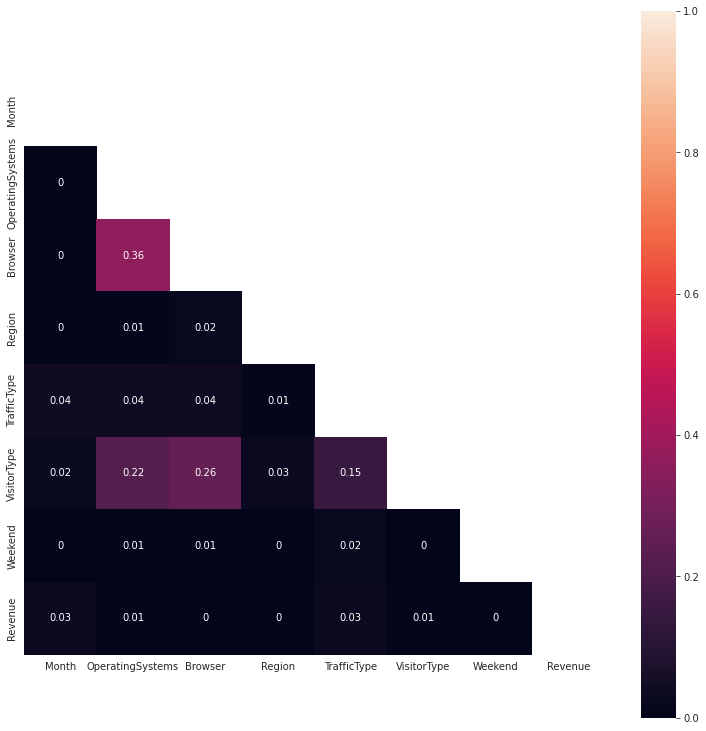

In [5]:
from sklearn import preprocessing

data_CV= df_original[["Month", "OperatingSystems", "Browser","Region", "TrafficType", "VisitorType", "Weekend", "Revenue" ]].copy()

#using data encoder to transform the categorical variables to numbers
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data_CV.columns :
  data_encoded[i]=label.fit_transform(data_CV[i])


from scipy.stats import chi2_contingency
import numpy as np

#function for chi-squared statistic test
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

#for loop to use Cramer's V test for corrolation. (Cramer's V test is based on Pearson's chi-squared statistic)
rows= []
for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)

#adding results to dataframe 
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True


#setting the heat map size
plt.figure(figsize = (13,13))

#corrolation heatmap 
with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True, annot=True)

plt.show()

* There are no highly corrolated categorical variables

* **method 2: Spearman**

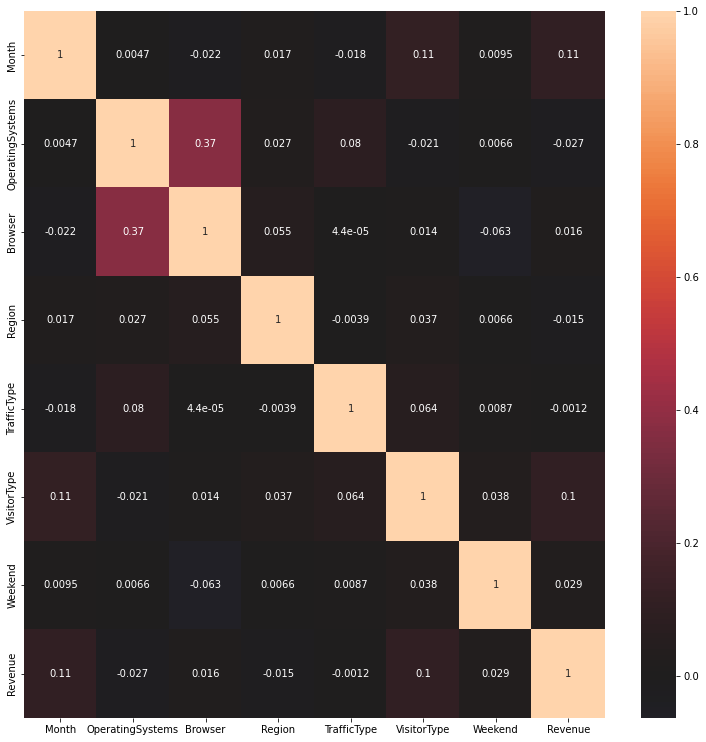

In [6]:
#creating a copy of dataset
df_cat= df1[["Month", "OperatingSystems", "Browser","Region", "TrafficType", "VisitorType", "Weekend", "Revenue" ]].copy()


#creating the correlation matrix
CorrMatrix= df_cat.corr(method="spearman")

#setting the heat map size
plt.figure(figsize = (13,13))

#creating a heat map from the correlation Matrix, adding the correlation number 
#to the map and using zero as centre of the heat map 
sns.heatmap(CorrMatrix, annot=True, center=0)

#printing the heat map
plt.show()

* There are no highly corrolated categorical variables
* Results from method 1 and 2 are very similar. 

**Corrolation _ Numerical variables**

In [7]:
#numerical variables + dependent variable "Revenue"
df_num= df_original[["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated",
                     "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay", "Revenue"]].copy()

**Looking at the corrolation between numerical attributes**

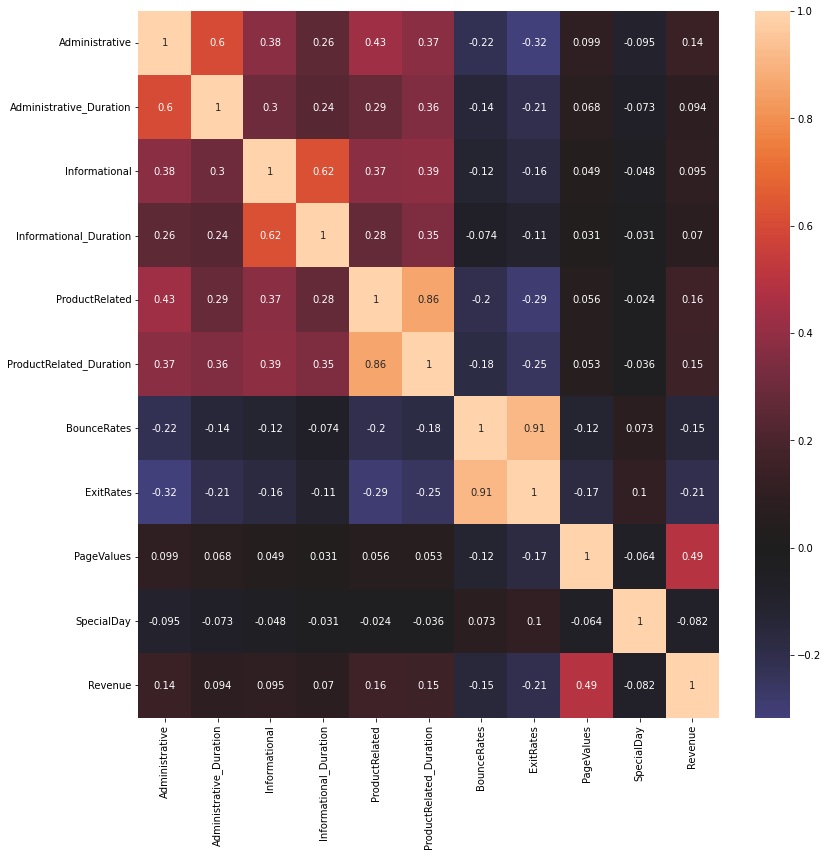

In [8]:
#creating the correlation matrix
CorrMatrix= df_num.corr()

#setting the heat map size
plt.figure(figsize = (13,13))

#creating a heat map from the correlation Matrix, adding the correlation number 
#to the map and using zero as centre of the heat map 
sns.heatmap(CorrMatrix, annot=True, center=0)

#printing the heat map
plt.show()

* None of the attributes are highly corrolated with the dependent variable "Revenue", however PageValues corrolation with "Revenue" is considerably higher (0.49) compared to all other attributes; as the second highest corrolation belongs to ExitRates at -0.21!

* BounceRates and ExitRates are highly corrolated (0.91). Also ProductRelated and ProductRelated_Duration are highly corrolated (0.86). These high coorolations should be considered during all stages of the project, and specifically modelling. We will decide which one to remove before the  modelling based on further analysis. Here we will check the correlations between each pair on a graph. Later we will also check the corrolation of these pairs with class Label "revenue" (Refer to EDA3.ipynb)

**BounceRates vs. ExitRates**

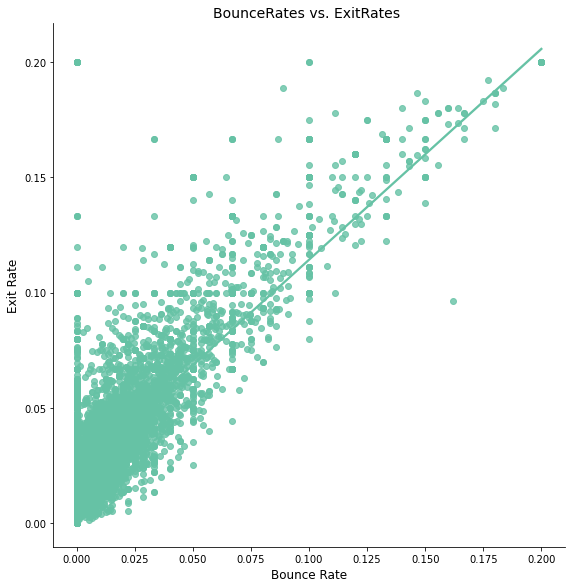

In [9]:
#setting up the color
sns.set_palette("Set2")

#creating the chart
sns.lmplot(x="BounceRates", y= "ExitRates",  data=df_original, height=8);

#setting the chart and axis labels
plt.xlabel("Bounce Rate", fontsize=12)
plt.ylabel("Exit Rate", fontsize=12)
plt.title("BounceRates vs. ExitRates ", fontsize=14);

* The corrolation between thses two variables are very high. We will consider this during tuning our models. 

**ProductRelated vs. ProductRelated_Duration**

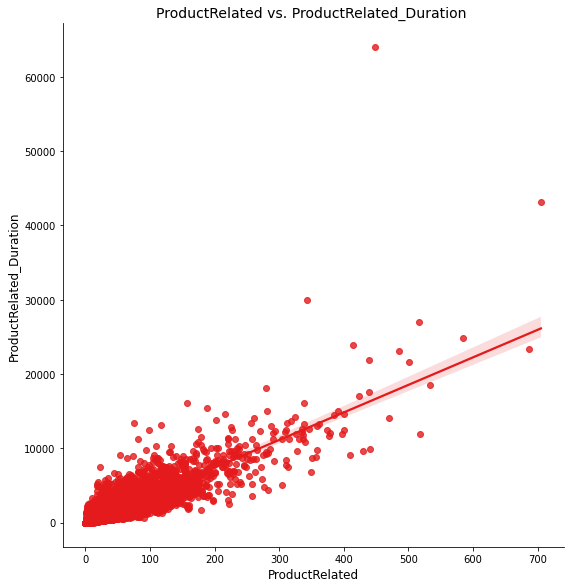

In [10]:
#setting up the color
sns.set_palette("Set1")

#creating the chart
sns.lmplot(x="ProductRelated", y= "ProductRelated_Duration",  data=df_original, height=8);

#setting the chart and axis labels
plt.xlabel("ProductRelated", fontsize=12)
plt.ylabel("ProductRelated_Duration", fontsize=12)
plt.title("ProductRelated vs. ProductRelated_Duration ", fontsize=14);

* The corrolation between thses two variables are very high. We will consider this during tuning our models. 

**Replacing Booleans (only exist in "Weekend" and "Revenue") with numbers**

In [11]:
df1.replace({True:1,False:0})

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1,0,0


# Categorical Variables and the Class Label "Revenue"

**Chi-Square Test of Independence:**

**We run a Chi-Squared test on categorical variables to see which attributes are important in predicting the dependent variable "Revenue":** 
* if P_value < alpha: "Revenue" is NOT independent of Categorical variable {i}
* if P_value > alpha : "Revenue" is independent of the Categorical variable {i}

**We use 95% confidence interval, so alpha= 0.05, and use a function to run the test.** 

In [12]:
#Defining the parent class for the test
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None #Degree of freedom 
        
        self.dfTabular = None
        self.dfExpected = None

#Function for Printing the result test based on comparing the P_Value and alpha 
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result= "P_value:",self.p, "Revenue is NOT independent of {0}".format(colX)
        else:
            result="P_value:",self.p, "Revenue is independent of {0}".format(colX)
        print(result)

#Fuction to run the test and use the provided alpha, and then returning 
#the P-value and the privously defined "printing the result"  

    def TestIndependence(self,colX,colY, alpha=0.05):
      
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = round(p, 4)
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)

In [13]:
cT = ChiSquare(df1)
#Feature Selection
testColumns = ['Month', "OperatingSystems",	"Browser",	"Region",	"TrafficType",	"VisitorType","Weekend"]
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Revenue" )

('P_value:', 0.0, 'Revenue is NOT independent of Month')
('P_value:', 0.0, 'Revenue is NOT independent of OperatingSystems')
('P_value:', 0.0061, 'Revenue is NOT independent of Browser')
('P_value:', 0.3214, 'Revenue is independent of Region')
('P_value:', 0.0, 'Revenue is NOT independent of TrafficType')
('P_value:', 0.0, 'Revenue is NOT independent of VisitorType')
('P_value:', 0.0013, 'Revenue is NOT independent of Weekend')


* As the result show only "Region" is not associated with the dependent variable "Revenue". We will consuder this during tuning our models. also we will examin the reality of it during selecting features of importance. 

**Visualizing each categorical variable vs "Revenue" to extract business insights**

* **"Month" vs "Revenue"**

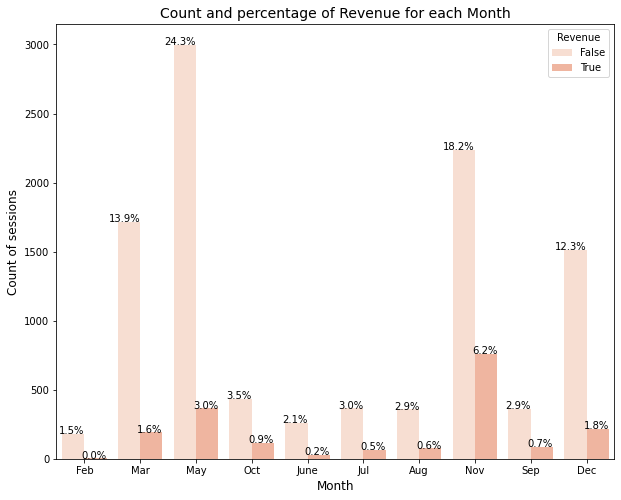

In [14]:
#setting size of the chart area
plt.figure(figsize = (10,8))
sns.set_palette("Reds")

#creating the chart
c1=sns.countplot(x="Month", hue= "Revenue", data=df_original);

#setting the chart and axis labels
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count of sessions", fontsize=12)
plt.title("Count and percentage of Revenue for each Month", fontsize=14)

#adding percentage labels
for p in c1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_original["Month"]))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    c1.annotate(percentage, (x, y),ha='right')


* Despite high number of visits in May (24.3% of annual visits), the conversion rate is half of November. Clearly Christmas Holidays have a big effect on the high purchase rate in November. 
* The company needs to develope new marketing strategies (i.e. offering special discounts for summer gear) specific to May and March to increase the purchase rate as These two spring months have high nummber of visits and low conversion rate.  
* The company also should look into fast delivery options for December as this month also has high number of visits and a very low conversion rate. 

* **"OperatingSystems" vs. "Revenue"**

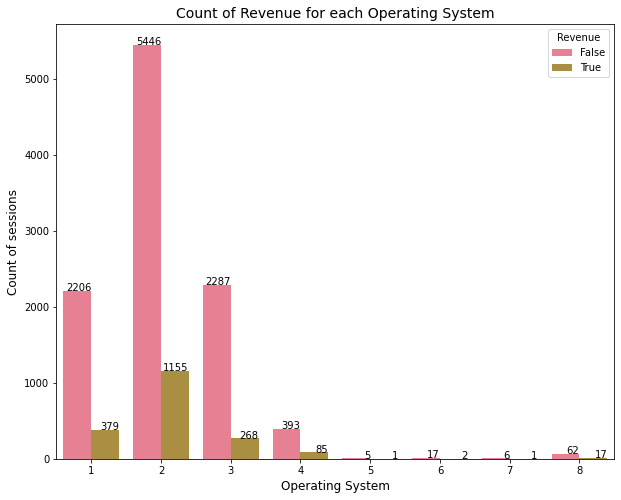

In [15]:
#setting size of the chart area
plt.figure(figsize = (10,8))
sns.set_palette("husl")

#creating the chart
c2=sns.countplot(x="OperatingSystems", hue= "Revenue", data=df_original);

#setting the chart and axis labels
plt.xlabel("Operating System", fontsize=12)
plt.ylabel("Count of sessions", fontsize=12)
plt.title("Count of Revenue for each Operating System", fontsize=14);

#adding labels
for p in c2.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width()
    y = p.get_height()
    c2.annotate(label, (x, y),ha='right')

* We observe higher number of purchases from operating system 2. However, if we look closer, the conversion rate for each Operating system may not say the same story.  let's calculate the conversion rate for each operating system individually.  

In [16]:
#creating a "for loop" to iterate over OperatingSystems 
#and displaying the result as a Dataframe

#Initiating an empty list for rows 
rows = []

#using length of the category counts of the Operating System for range of iteration 
for i in range(1,((len(df_original.OperatingSystems.value_counts()))+1)):

  #count of observations for each operating system where the "Revenue" is True 
  x = len(df_original.loc[df_original.OperatingSystems.eq(i) & df_original.Revenue.eq(True)])

  #count of total observations for each operating system
  y= len(df_original.OperatingSystems.loc[df_original["OperatingSystems"] == i])

  #calculating the Conversion rate with 2 decimal points
  ConversionRate= round((x/y)*100, 2)

  #adding the result along with the operating system (i) to the initiated list for rows
  rows.append([i, ConversionRate])

  #assiging the next number of operating system to restart the loop 
  i=+1

#defining the dataframe using rows from the loop and assigning names to the columns, and sorting the result in descending order
df = pd.DataFrame(rows, columns=["Operating System", "Conversion Rate(%)"]).sort_values(by=["Conversion Rate(%)"], ascending=False)

#Displaying the result as fataframe 
display(df)


,Operating System,Conversion Rate(%)
7,8,21.52
3,4,17.78
1,2,17.50
4,5,16.67
0,1,14.66
6,7,14.29
5,6,10.53
2,3,10.49


* It's worth noting that the Operating System 8 has the highest conversion rate followed by 4 and then 2. Even though Operating system 2 has the highest number of visits. 
* As mentioned earlier in univariate EDA, popularity of one or two operating system is the reason for the high number of visits. However operating systems such as 8 should be expected by the marketing team for differences compared to other systems (i.e. OS1 and OS2) and take advantage of any applicable criteria in improving the company e-commerce website. For example in Windows OS the close window fuction is located at the top right, however in Mac it's at the top left. If Mac OS is produsing higher conversian rate, then the location of the close button for the product images on the company website should be  placed in top left. 

* **"Browser" vs. "Revenue"**

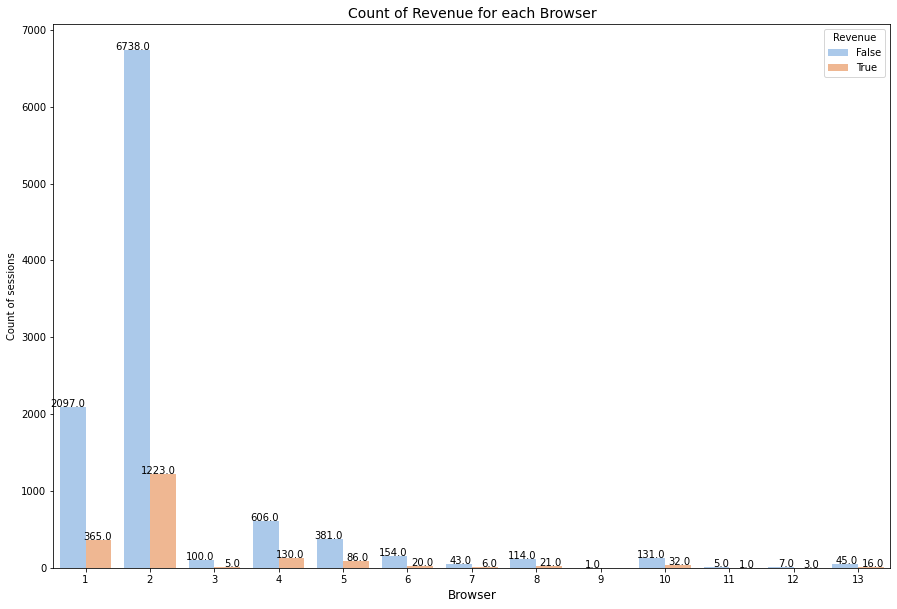

In [17]:
#setting size of the chart area
plt.figure(figsize = (15,10))
sns.set_palette("pastel")

#creating the chart
c3=sns.countplot(x="Browser", hue= "Revenue", data=df_original);

#setting the chart and axis labels
plt.xlabel("Browser", fontsize=12)
plt.ylabel("Count of sessions", fontsize=10)
plt.title("Count of Revenue for each Browser", fontsize=14);

#adding labels
for p in c3.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width()
    y = p.get_height()
    c3.annotate(label, (x, y),ha='right')

* We observe higher number of purchases from Browser type 2 followed by type 1. Again, looking at the conversion rate for each Browser may reveal more information.  let's calculate the conversion rate for each Browser type individually.

In [18]:
#creating a "for loop" to iterate over Browser types 
#and displaying the result as a Dataframe

#Initiating an empty list for rows 
rows = []

#using length of the category counts of the Browser for range of iteration 
for i in range(1,((len(df_original.Browser.value_counts()))+1)):

  #count of observations for each Browser where the "Revenue" is "True" 
  x = len(df_original.loc[df_original.Browser.eq(i) & df_original.Revenue.eq(True)])

  #count of total observations for each Browser
  y= len(df_original.Browser.loc[df_original["Browser"] == i])

  #calculating the Conversion rate with 2 decimal points
  ConversionRate= round((x/y)*100, 2)

  #adding the result along with the Browser(i) to the initiated list for rows
  rows.append([i, ConversionRate])

  #assiging the next number of Browser to restart the loop 
  i=+1

#defining the dataframe using rows from the loop and assigning names to the columns, and sorting the result in descending order
df = pd.DataFrame(rows, columns=["Browser", "Conversion Rate(%)"]).sort_values(by=["Conversion Rate(%)"], ascending=False)

#Displaying the result as fataframe 
display(df)


,Browser,Conversion Rate(%)
11,12,30.00
12,13,26.23
9,10,19.63
4,5,18.42
3,4,17.66
10,11,16.67
7,8,15.56
1,2,15.36
0,1,14.83
6,7,12.24


* Browser 12 & 13 have higher conversion rates than type 1 & 2, while 1 & 2 have the highest number of visits. Aside from popularity of some browsers, the marketing team must compare the differences between the browser types and find out what advantages certain browers are providing that may have a positive effect on the company's revenue. For example: some browsers such as "Edge" from "Microsoft" have an accecibility option ("Read aloud this page") enabled in the browser by default, while for "Google" such option needs to be found from the setting, and activated. In such case, addding an accebility option to the e-commerce website can be beneficial. 

* **"Region" vs. "Revenue"**

**Note:** *Even though we have determined with 95% confidence that the revenue is independent of Region, it can still provide some insights.*  

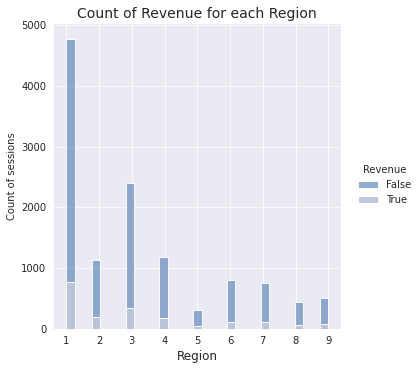

In [19]:
#setting the color theme 
sns.set_palette("vlag")
sns.set_style("darkgrid")

#creating the chart
c4=sns.displot(df_original, x='Region', hue='Revenue', multiple='stack');

#setting the chart and axis labels
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count of sessions", fontsize=10)
plt.title("Count of Revenue for each Region", fontsize=14);


* In general this chart provides info to the marketing team to focus on advertisement in specific areas to increase **the number of visits**, as the conversion rate is independent of the Region!

* The company should consider marketing strategies specific to region.For example, in regions with low number of visits like 5, finding which competitor are in upward trends and why! 

* It's worth taking a survey from people visiting from region 1 to determine the main reason for high  number of visits and low conversion rate. The survey can help marketing team to adapt strategies for advertisement in regions 2 to 9 to increase number of visits. 

* For example, sometimes fans are drawn to a specific sport e-commerce website, because the aesthetics of the website includes color of the sport team they support. Therefore, making customized colors for each region can have an impact on number of visits. 

* **"TrafficType" vs. "Revenue"**

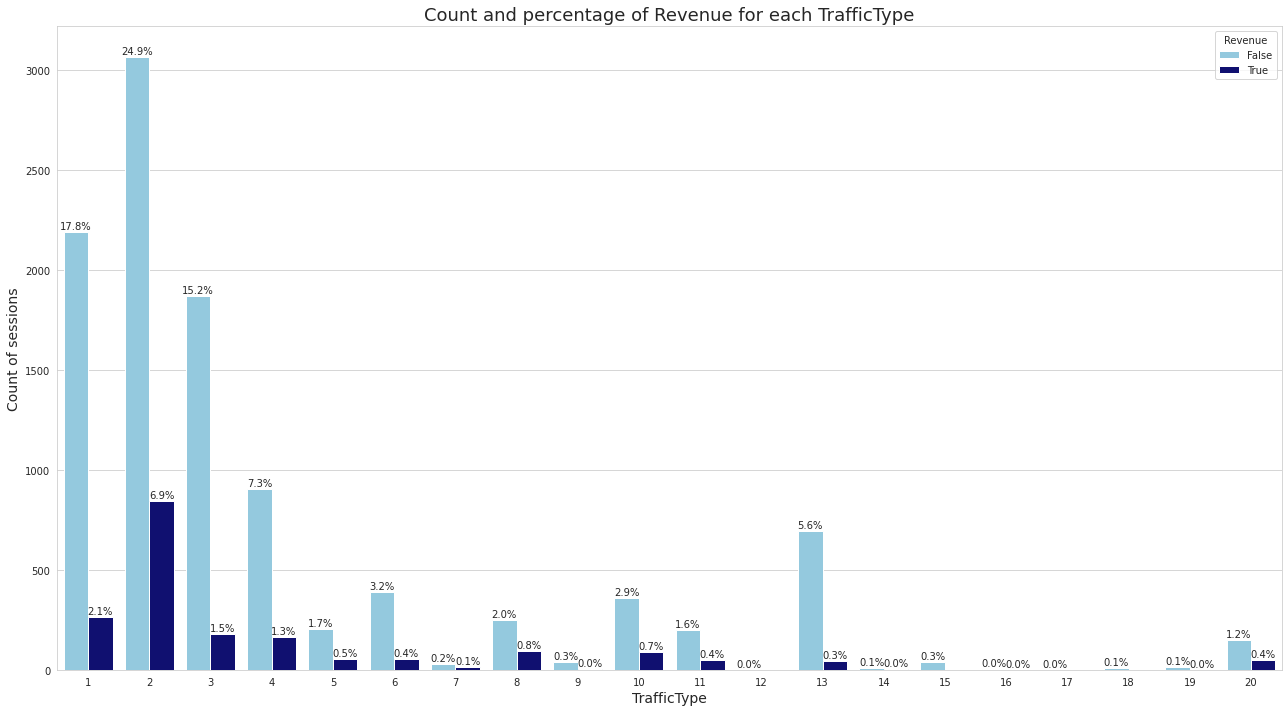

In [20]:
#setting size of the chart area
plt.figure(figsize = (18,10))
sns.set_palette(['skyblue','navy'])
sns.set_style("whitegrid")

#creating the chart
c5=sns.countplot(x="TrafficType", hue= "Revenue" , data=df_original);

#setting the chart and axis labels
plt.xlabel("TrafficType", fontsize=14)
plt.ylabel("Count of sessions", fontsize=14)
plt.title("Count and percentage of Revenue for each TrafficType", fontsize=18)

#adding percentage labels
for p in c5.patches:
    percentage = f'{100 * p.get_height() / len(df_original["TrafficType"]):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    c5.annotate(percentage, (x, y),ha='center', va='center')

    plt.tight_layout()

* TrafficType 1, 2, and 3 together count for the majority of visits as well as high conversion rate overall. This can be explored further by to discover the reason for this result. For example, if These TrafficTypes are being directed from high trusted websites, the focus can be placed in expanding re-direction from such trusted webpages. 

* **"VisitorType" vs. "Revenue"**

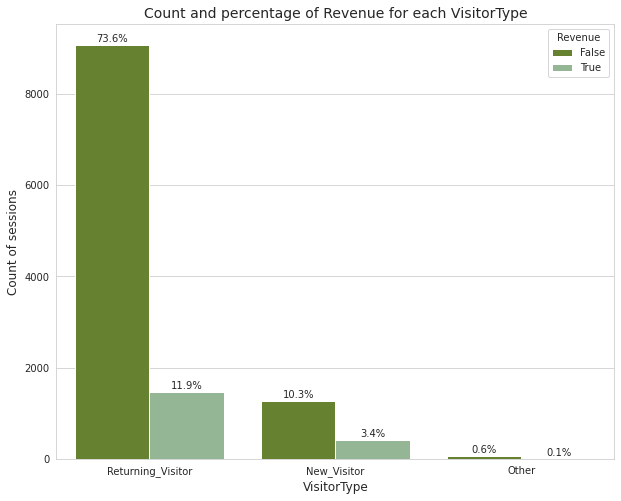

In [21]:
#setting size of the chart area
plt.figure(figsize = (10,8))
sns.set_palette(['olivedrab','darkseagreen'])
sns.set_style("whitegrid")

#creating the chart
c6=sns.countplot(x="VisitorType", hue= "Revenue" , data=df_original);

#setting the chart and axis labels
plt.xlabel("VisitorType", fontsize=12)
plt.ylabel("Count of sessions", fontsize=12)
plt.title("Count and percentage of Revenue for each VisitorType", fontsize=14)


#adding percentage labels
for p in c6.patches:
    percentage = f'{100 * p.get_height() / len(df_original["VisitorType"]):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    c6.annotate(percentage, (x, y),ha='center', va='center')


* We can see that most of the sessions belong to the returning customers. While this is a good sign for the product price and quality, it also shows that the company needs to improve their advertisement strategies to attract new customers. Let's explore the conversion rate for each type of customer: 

In [22]:
#creating a "for loop" to iterate over VisitorType and displaying the result as a Dataframe
#Note: Using df1 instead of df_original to iterate over visitor types 

#Initiating an empty list for rows 
rows = []

#using length of the category counts of the VisitorType for range of iteration 
for i in range(1,((len(df1.VisitorType.value_counts()))+1)):

  #count of observations for each Visitor Type where the "Revenue" is True 
  x = len(df1.loc[df1.VisitorType.eq(i) & df1.Revenue.eq(1)])

  #count of total observations for each Visitor Type
  y= len(df1.VisitorType.loc[df1["VisitorType"] == i])

  #calculating the Conversion rate with 2 decimal points
  ConversionRate= round((x/y)*100, 2)

  #adding the result along with the oVisitorType(i) to the initiated list for rows
  rows.append([i, ConversionRate])

  #assiging the next number of Visitor Type to restart the loop 
  i=+1

#defining the dataframe using rows from the loop and assigning names to the columns, and sorting the result in descending order
df = pd.DataFrame(rows, columns=["Visitor Type", "Conversion Rate(%)"]).sort_values(by=["Conversion Rate(%)"], ascending=False)

#Displaying the result as fataframe 
display(df)

,Visitor Type,Conversion Rate(%)
1,2,24.91
2,3,18.82
0,1,13.93


Reminder: VisitorType= {'Returning_Visitor':1, 'New_Visitor':2, 'Other':3} 

The result show that the new visitors have higher conversion rate than returning ones. Many marketing strategies can help increase the conversion rate; such as: 
* offering discount on second purchase after the first purchase is made
* creating a points system for evey dollar spent 
* offering certain percentage discount after certain amount spent in a time frame 

**"Weekend" vs. "Revenue"**

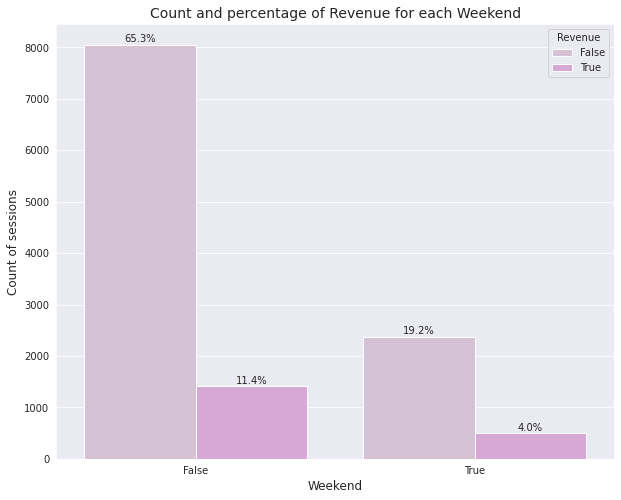

In [23]:
#setting size of the chart area
plt.figure(figsize = (10,8))
sns.set_palette(['thistle','plum'])
sns.set_style("darkgrid")

#creating the chart
c7=sns.countplot(x="Weekend", hue= "Revenue" , data=df_original);

#setting the chart and axis labels
plt.xlabel("Weekend", fontsize=12)
plt.ylabel("Count of sessions", fontsize=12)
plt.title("Count and percentage of Revenue for each Weekend", fontsize=14)

#adding percentage labels
for p in c7.patches:
    percentage = f'{100 * p.get_height() / len(df_original["Weekend"]):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    c7.annotate(percentage, (x, y),ha='center', va='center')

* As mentioned in the univariate analysis, the majority of visits occur on weekdays, however by looking at the chart we can see that the conversion rate on weekend (4/23.2 = 17.2%) is slightly higher than weekdays (11.4/76.7 ~ 14.8%).  The main reason can be that during the week the visitors may try to make purchases during work or lunch hours, and may be forced to closing the session prior to purchase for number of reasons, or due to wanting to hear their patner's opinions. however on weekends the visiotrs most likly have less distractions and have someone helping them decide. A marketing strategy could be having specific sales during the weekdays to encourage the finlization of the purchase. 

# Numerical Variables and the Class Label "Revenue"

**Chi-Square Test of Independence:**

**We run a Chi-Squared test on Numerical variables That are discrete variables to see which attributes are important in predicting the dependent variable "Revenue":** 
* if P_value < alpha: "Revenue" is NOT independent of Discrete variable {i}
* if P_value > alpha : "Revenue" is independent of the Discrete variable {i}

**We use 95% confidence interval, so alpha= 0.05, and use the same function we used priviously for categorical variables to run the test.** 

In [24]:
cT = ChiSquare(df1)
#Feature Selection
testColumns = ["Administrative",	"Informational",	"ProductRelated"]
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Revenue" )

('P_value:', 0.0, 'Revenue is NOT independent of Administrative')
('P_value:', 0.0, 'Revenue is NOT independent of Informational')
('P_value:', 0.0, 'Revenue is NOT independent of ProductRelated')


* We can say with 95% confidence that "Revenue" is associated with all these 3 discrete variables.

**Visualizing each numerical variable vs "Revenue" to extract business insights**

* **"Administrative",	"Informational",	"ProductRelated", "SpecialDay" vs. "Revenue"** 

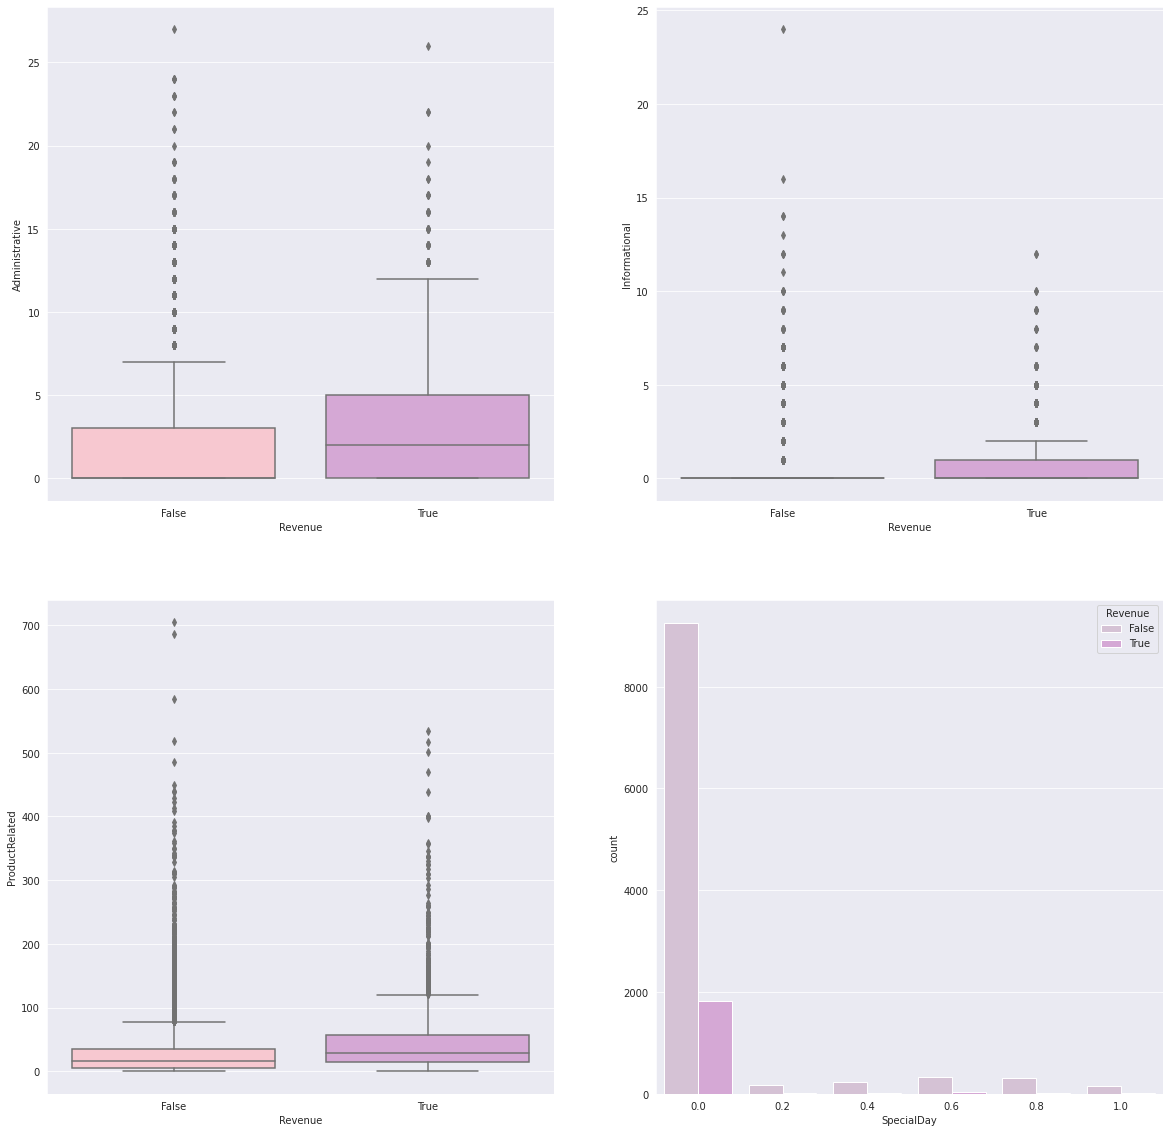

In [25]:
#setting the chart size and theme
sns.set_style('darkgrid')
plt.figure(figsize = (20,20))

#using the first place holder for the first chart
plt.subplot(2,2,1)

#creating the first chart
sns.boxplot(y="Administrative", x="Revenue", palette=["pink", "plum"], data=df_original);

#using the second place holder for the first chart
plt.subplot(2,2,2)

#creating the second chart
sns.boxplot(y="Informational", x="Revenue", palette=["pink", "plum"], data=df_original);

#using the third place holder for the first chart
plt.subplot(2,2,3)

#creating the third chart
sns.boxplot(y="ProductRelated", x="Revenue", palette=["pink", "plum"], data=df_original);

#using the forth place holder for the first chart
plt.subplot(2,2,4)

#creating the forth chart
sns.countplot(x="SpecialDay", hue="Revenue", data=df_original);


* The more number of pages a customer visit, more likely to finilize the purchase. 
* Closeness to special day does not improve the conversion rate. Again, we see that this is most likely due to long delivery dates. it seems that the company needs to implenet a new and faster delivery option.  

* **"Administrative_Duration",	"Informational_Duration",	"ProductRelated_Duration" vs. "Revenue"** 

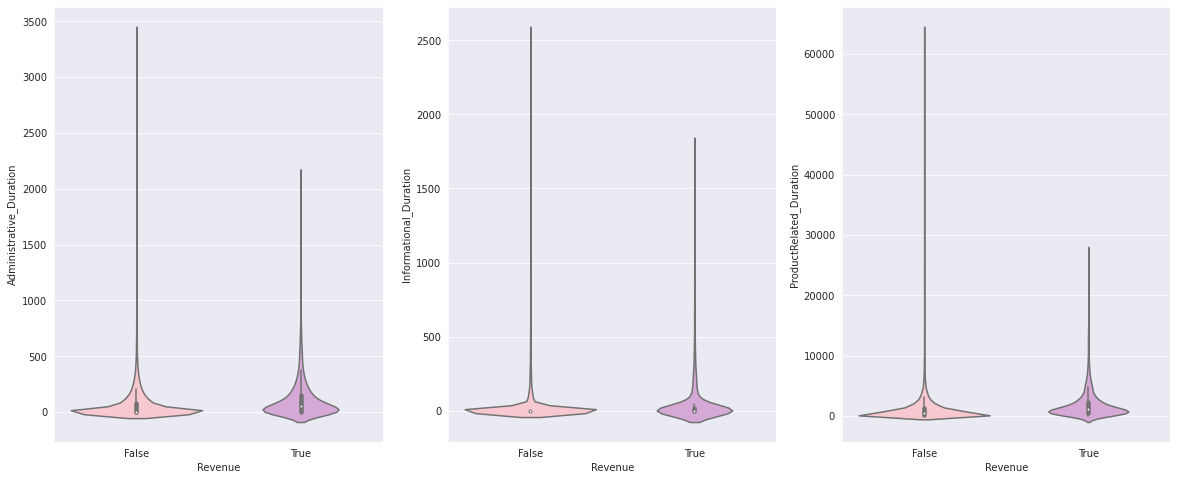

In [26]:
#setting the chart size and theme
sns.set_style('darkgrid')
plt.figure(figsize = (20,8))

#using the first place holder for the first chart
plt.subplot(1,3,1)

#creating the first chart
sns.violinplot(y="Administrative_Duration", x="Revenue", palette=["pink", "plum"], data=df_original);

#using the second place holder for the first chart
plt.subplot(1,3,2)

#creating the second chart
sns.violinplot(y="Informational_Duration", x="Revenue", palette=["pink", "plum"], data=df_original);

#using the third place holder for the first chart
plt.subplot(1,3,3)

#creating the third chart
sns.violinplot(y="ProductRelated_Duration", x="Revenue", palette=["pink", "plum"], data=df_original);




* The longer customer spend on any type of pages, the more likely to finilize the purchase. 

**"BounceRates", "ExitRates", "PageValues" vs. "Revenue"**

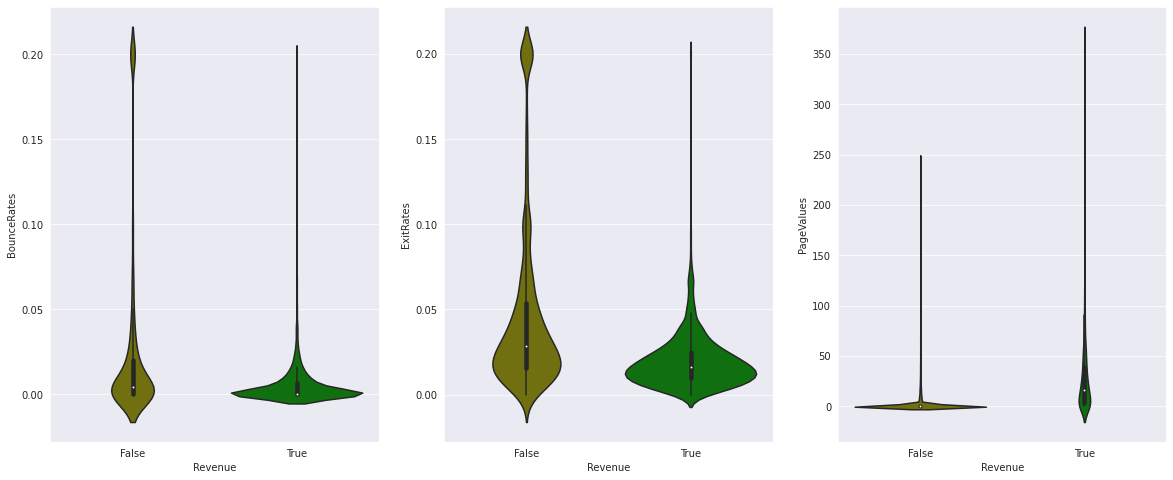

In [27]:
#setting the chart size and theme
sns.set_style('darkgrid')
plt.figure(figsize = (20,8))

#using the first place holder for the first chart
plt.subplot(1,3,1)

#creating the first chart
sns.violinplot(y="BounceRates", x="Revenue", palette=["olive", "green"], data=df_original);

#using the second place holder for the first chart
plt.subplot(1,3,2)

#creating the second chart
sns.violinplot(y="ExitRates", x="Revenue", palette=["olive", "green"], data=df_original);

#using the third place holder for the first chart
plt.subplot(1,3,3)

#creating the third chart
sns.violinplot(y="PageValues", x="Revenue", palette=["olive", "green"], data=df_original);


**Note: There are 3 notebooks containing EDA. Please check out the EDA 1 & 3.**